In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#PERIOD AND NUMBER OF POINTS
T=1.
N=1000
#MESH
t=np.linspace(0,T,N)
dt=t[1]-t[0]
def f(t):
#SINGLE SIGN WAVE
    return np.sin(2*3.1415*t/T)
#SUPERPOSITION OF SIGN WAVES
# return np.sin(2*3.1415*t/T)+np.sin(2*3.1415*t/(0.5*T))+np.sin(2*3.1415*t/(0.75*T))


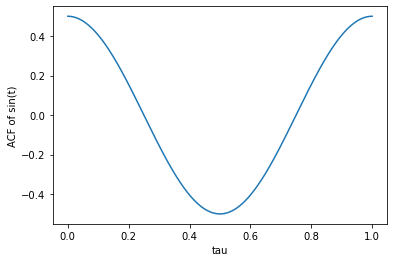

In [15]:
#LOOP OVER LAGS
NLAG=2
for i in range(0,NLAG):
#LAG
    lag=int((i/NLAG)*N) #tag in terms of number of data point to shift
    tau=dt*lag #lag in time units
#PLOT ACF OF SINE
    if(i==0):
        plt.xlabel('tau')
        plt.ylabel('ACF of sin(t)')
        plt.plot(t,0.5*np.cos(2*3.1415*t/T))
        plt.show()

------------------
TAU:  0.5005005005005005
COVARIANCE(y1,y2):  -0.49951240566128624
ACF(TAU):  -0.4999976713394578
PEARSON CORRELATION(y1,y2):  -0.9999953336387847


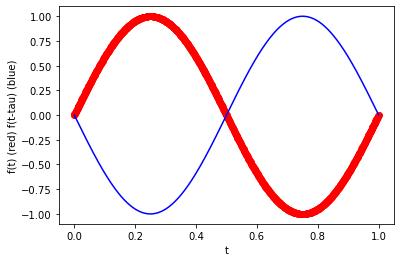

In [7]:
y1=f(t)
y2=f(t-tau)
#COMPUTE CROSS CORRELATION
print("------------------")
print("TAU: ", tau)
print("COVARIANCE(y1,y2): ", np.mean((y1-np.mean(y1))*(y2-np.mean(y2))))
print("ACF(TAU): ", 0.5*np.cos(2*3.1415*tau/T))
print("PEARSON CORRELATION(y1,y2): ", np.mean((y1-np.mean(y1))*(y2-np.mean(y2)))/np.std(y1)/np.std(y2))
# print("STD-1, STD-2:", np.std(y1),np.std(y2))
#COMPARE WAVE FORMS
plt.ylabel("f(t) (red) f(t-tau) (blue)")
plt.xlabel('t')
plt.plot(t,y1, 'r-o')
plt.plot(t,y2, 'b-')
plt.show()


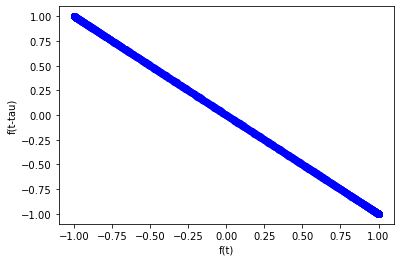

In [8]:
#PARITY PLOT
plt.xlabel('PARITY PLOT')
plt.xlabel('f(t)')
plt.ylabel("f(t-tau)")
plt.plot(y1,y2, 'b-o')
plt.show()


In [17]:
import numpy as np
from scipy.io.wavfile import read as wavread
from scipy.io.wavfile import write as wavwrite

In [18]:
rate, data = wavread('C:\\Users\\ShiZa23\\Downloads\\sound-1.wav')
print('rate:',rate,'Hz')
print('data is a:',type(data))
print('data shape is:', data.shape)

rate: 48000 Hz
data is a: <class 'numpy.ndarray'>
data shape is: (219136,)


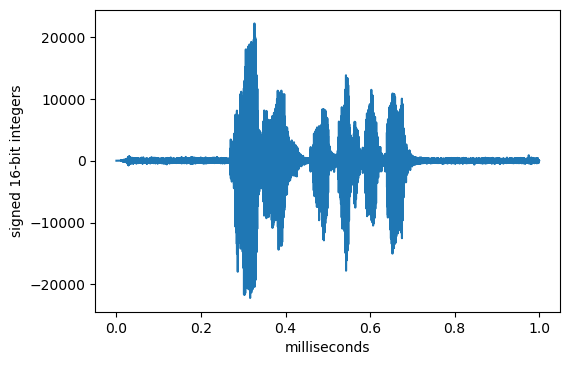

In [19]:
T=1.
N=219136
#MESH
t=np.linspace(0,T,N)
import matplotlib.pyplot as plt
plt.subplots(dpi=100)
plt.plot(t, data)
plt.xlabel('milliseconds')
plt.ylabel('signed 16-bit integers')
plt.show()

In [20]:
print("ACF(TAU): ", 0.5*data)

ACF(TAU):  [ 0.   0.   0.  ... -1.5 -1.5 -1. ]


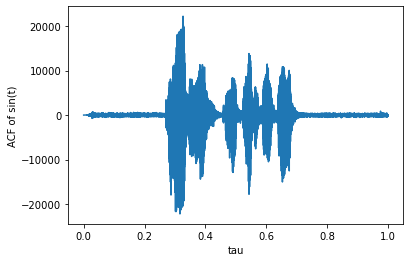

In [21]:
#LOOP OVER LAGS
NLAG=2
for i in range(0,NLAG):
#LAG
    lag=int((i/NLAG)*N) #tag in terms of number of data point to shift
    tau=dt*lag #lag in time units
#PLOT ACF OF SINE
    if(i==0):
        plt.xlabel('tau')
        plt.ylabel('ACF of Wav file with Lag = 2')
        plt.plot(t,data)
        plt.show()